In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../Downloads/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,NaN,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name            11
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df = df.drop(columns = ["Cabin"])

In [5]:
df = df.drop(columns = ["PassengerId"])

In [6]:
df = df.drop(columns = ["Name"])

In [7]:
df["Age"] = df["Age"].fillna(df["Age"].mode()[0])

In [8]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

In [9]:
df = df.drop(columns = ["Ticket"])

In [10]:
df["Embarked"]=df["Embarked"].fillna(df["Embarked"].mode()[0])

In [11]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [12]:
df["Sex"] = df["Sex"].replace({"male":0,"female":1})
df["Sex"]

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

In [13]:
df["Embarked"] = df["Embarked"].replace({"S":0, "Q":1, "C":2})
df["Embarked"]

0      0
1      2
2      0
3      0
4      0
      ..
886    0
887    0
888    0
889    2
890    1
Name: Embarked, Length: 891, dtype: int64

<AxesSubplot:>

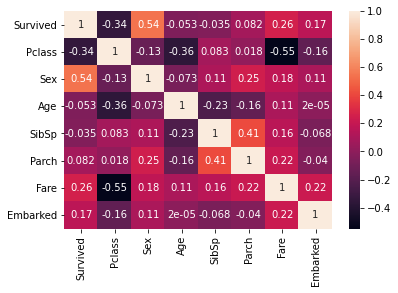

In [14]:
sns.heatmap(df.corr(), annot = True)

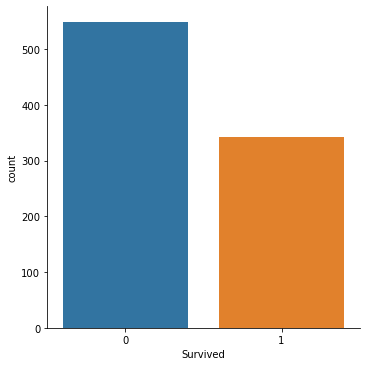

In [15]:
sns.catplot(data = df, kind = "count", x = "Survived")

In [16]:
x = df.drop(columns = "Survived")
y = df["Survived"]

In [17]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [18]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xtrain, ytrain)

C:\Users\sarth\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
ypred = model.predict(xtest)

In [20]:
ypred

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0], dtype=int64)

Accuracy is: 0.8100558659217877
[[91 19]
 [15 54]]
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       110
           1       0.74      0.78      0.76        69

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



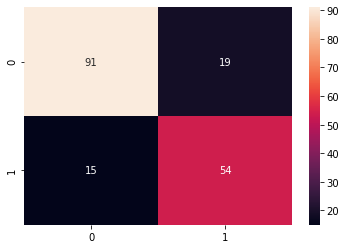

In [23]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
acc = accuracy_score(ytest, ypred)
print("Accuracy is:", acc)
cm = confusion_matrix(ytest, ypred)
print(cm)
sns.heatmap(cm, annot = True)
print(classification_report(ytest, ypred))

In [24]:
tn, fp, fn, tp = confusion_matrix(ytest, ypred).flatten()
print("True Positive: ",tp)
print("True Negative: ",tn)
print("False Positive: ",fp)
print("False Negative: ",fn)

True Positive:  54
True Negative:  91
False Positive:  19
False Negative:  15
